In [1]:
import kagglehub

kagglehub.dataset_download("aungpyaeap/supermarket-sales")

'/Users/samuelarthur/.cache/kagglehub/datasets/aungpyaeap/supermarket-sales/versions/3'

In [2]:
import pandas as pd

df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Attribute information
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Dataset Overview:
This is a historical sales dataset from a supermarket company with three branches. 
Let's break down the key aspects:

Time Period:
Data spans from January to March 2019
Contains daily transaction records

Geographical Coverage:
Three branches: Yangon (Branch A), Mandalay (Branch B), and Naypyitaw (Branch C)

Key Variables:
Customer-Related:

Customer type (Member/Normal)
- Gender (Male/Female)
- Payment method (Cash/Card/E-wallet)
- Customer rating (1-10 scale)


Product-Related:

Product line (6 categories):

- Electronic accessories
- Fashion accessories
- Food and beverages
- Health and beauty
- Home and lifestyle
- Sports and travel

Unit price
- Quantity purchased

Financial Metrics:
- Gross margin percentage
- Gross income
- Tax (5%)
- Total


Potential Analysis Goals:

Sales Performance Analysis:

- Compare performance across branches
- Identify best-selling product categories
- Analyze sales trends over time


Customer Behavior:

- Study purchase patterns between member vs normal customers
- Analyze gender-based purchasing preferences
- Evaluate payment method preferences

Financial Analysis:

- Calculate profitability by product line
- Analyze gross margin patterns
- Study transaction values

Customer Satisfaction:

- Analyze rating patterns across different variables
- Identify factors affecting customer satisfaction

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
isnull = df.isnull().sum()
print(f"Number of null values: {isnull.sum()}")

Number of null values: 0


In [6]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Convert 'Time' to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [9]:
df.loc[:,["Date", "Time"]]


,Date,Time
0,2019-01-05,13:08:00
1,2019-03-08,10:29:00
2,2019-03-03,13:23:00
3,2019-01-27,20:33:00
4,2019-02-08,10:37:00
...,...,...
995,2019-01-29,13:46:00
996,2019-03-02,17:16:00
997,2019-02-09,13:22:00
998,2019-02-22,15:33:00


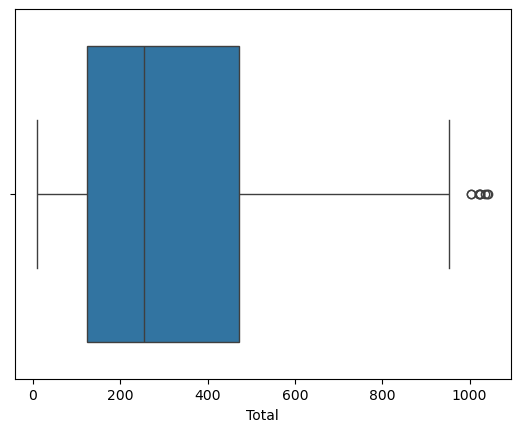

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#checking for outliers
sns.boxplot(x=df['Total'])
plt.show()

In [13]:
df.groupby('Product line')['Total'].describe()


,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,170.0,319.632538,245.945626,26.7225,118.503000,241.21650,475.823250,942.4485
Fashion accessories,178.0,305.089298,243.564130,12.6945,106.155000,211.64850,442.690500,1042.6500
Food and beverages,174.0,322.671517,247.157780,22.6590,134.904000,252.48825,452.647125,1034.4600
Health and beauty,152.0,323.643020,237.538815,18.6375,125.666625,272.30700,492.720375,950.2500
Home and lifestyle,160.0,336.636956,254.600671,14.6790,126.076125,258.18975,491.762250,1023.7500
Sports and travel,166.0,332.065220,248.375328,10.6785,133.260750,270.93150,477.684375,1002.1200


In [14]:
print("Mean:", df['Total'].mean())
print("Median:", df['Total'].median())


Mean: 322.966749
Median: 253.848


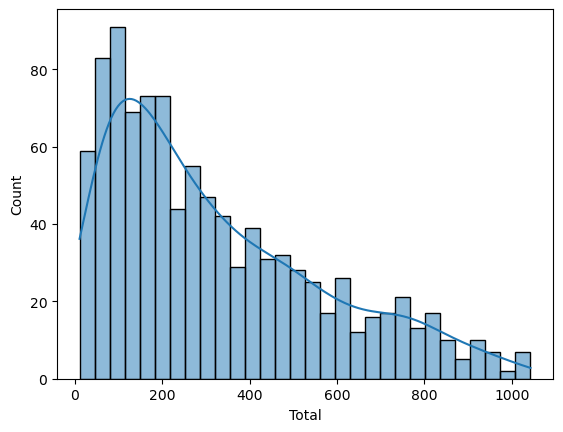

In [15]:
sns.histplot(df['Total'], bins=30, kde=True)
plt.show()


Based on the results:

Outliers Across Product Lines:

The max Total values are significantly higher than the 75th percentile for all product lines (e.g., 1042.65 for "Fashion accessories" vs 442.69 at 75%).
This suggests that outliers represent unusually large transactions, which appear legitimate and not errors.
Impact on Mean and Median:

The overall mean of 322.97 is much higher than the median of 253.85.
This confirms that the outliers are skewing the distribution towards higher values.
Distribution Shape:

The histogram shows a right-skewed distribution, indicating that most transactions are small or moderate, while a few transactions have extremely high totals.

Actions to take:

Keep the Outliers:

Since the outliers are consistent across product lines and likely represent high-value purchases, they are important insights for business analysis (e.g., identifying big spenders, bulk orders).
Separate Analysis:

Analyze these outliers separately to understand:
Which product lines contribute to the high totals.
Patterns of large transactions (e.g., frequent customers, time of purchase).

In [16]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -395.9694375, Upper Bound: 991.7420625


In [26]:
outliers = df[df['Total'] > upper_bound]
print(outliers.shape)

(9, 17)


In [27]:
outliers_by_product = outliers.groupby('Product line')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_product)

                     count        mean      max
Product line                                   
Fashion accessories      3  1034.21500  1042.65
Food and beverages       1  1034.46000  1034.46
Home and lifestyle       4  1018.05375  1023.75
Sports and travel        1  1002.12000  1002.12


In [28]:
outliers_by_customer = outliers.groupby('Customer type')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_customer)

               count       mean      max
Customer type                           
Member             3  1032.6050  1042.65
Normal             6  1018.9375  1039.29


In [29]:
outliers_by_time = outliers.groupby('Time')['Total'].sum().sort_values(ascending=False)
print(outliers_by_time.head(10))  # Top times with high-value transactions

Time
14:53:00    1042.650
16:20:00    1039.290
20:23:00    1034.460
16:18:00    1023.750
17:16:00    1022.490
13:48:00    1022.385
13:00:00    1020.705
13:32:00    1003.590
13:45:00    1002.120
Name: Total, dtype: float64


In [30]:
outliers_by_date = outliers.groupby('Date')['Total'].sum().sort_values(ascending=False)
print(outliers_by_date.head(10))  # Top dates with high-value transactions

Date
2019-02-08    2059.995
2019-02-15    1042.650
2019-01-30    1034.460
2019-01-12    1023.750
2019-03-02    1022.490
2019-01-15    1022.385
2019-01-16    1003.590
2019-01-09    1002.120
Name: Total, dtype: float64


In [32]:
outliers_by_payment = outliers.groupby('Payment')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_payment)

             count       mean      max
Payment                               
Cash             2  1002.8550  1003.59
Credit card      4  1031.2575  1042.65
Ewallet          3  1026.9000  1034.46


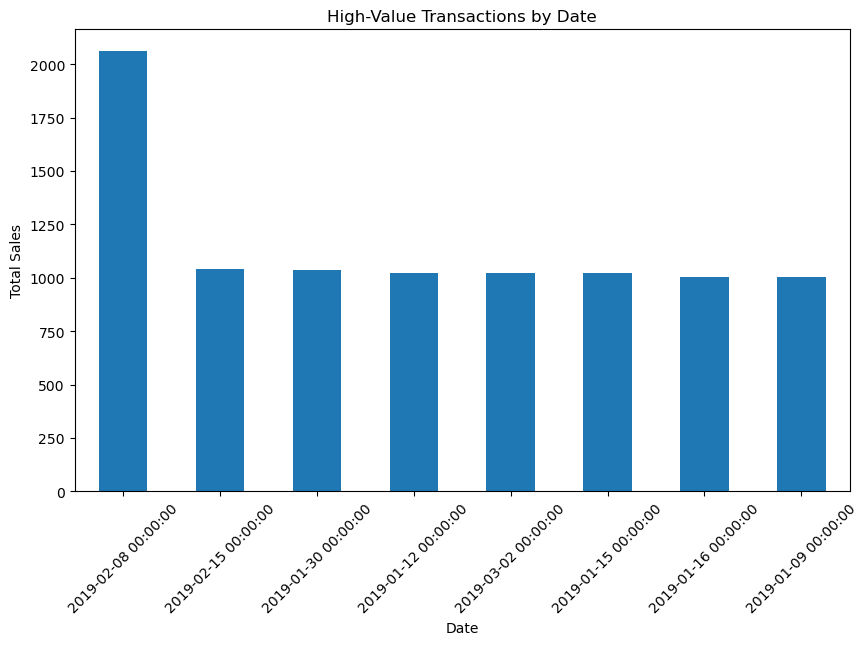

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
outliers_by_date.plot(kind='bar')
plt.title("High-Value Transactions by Date")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

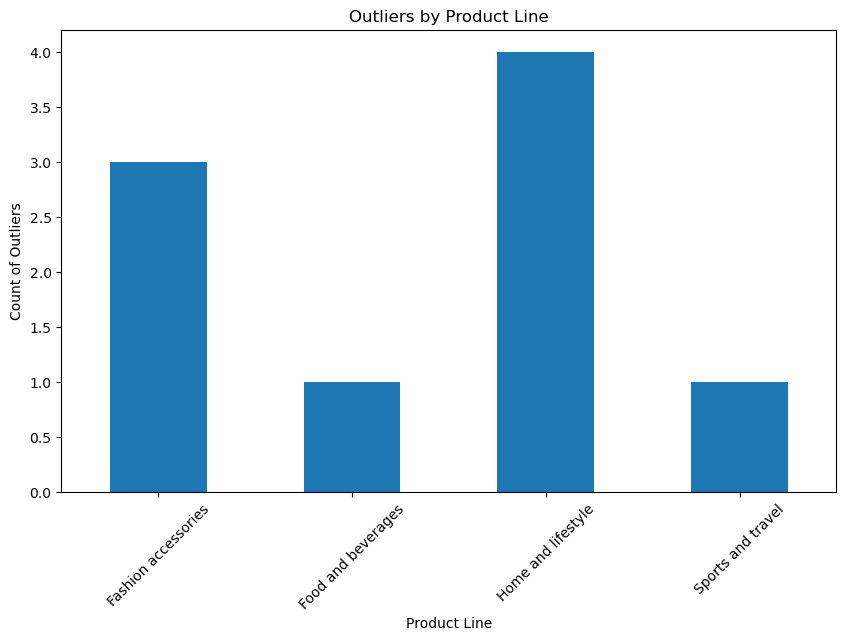

In [33]:
plt.figure(figsize=(10, 6))
outliers_by_product['count'].plot(kind='bar')
plt.title("Outliers by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.show()


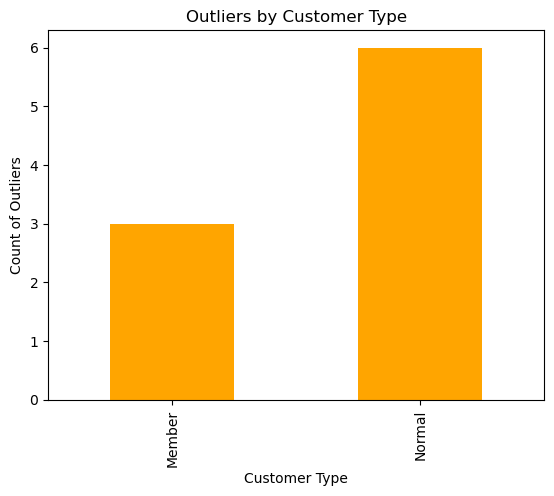

In [34]:
outliers_by_customer['count'].plot(kind='bar', color='orange')
plt.title("Outliers by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count of Outliers")
plt.show()


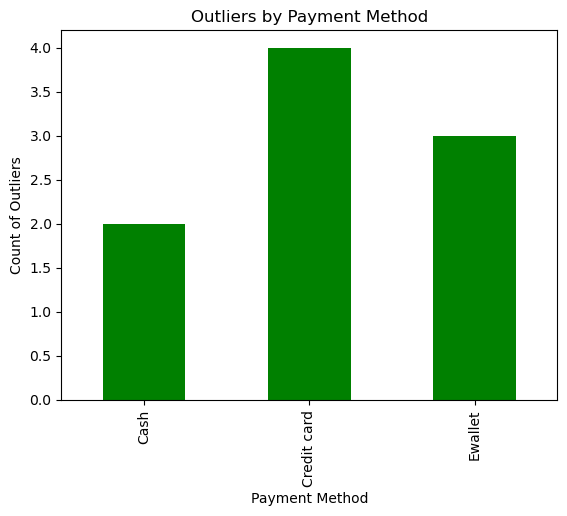

In [35]:
outliers_by_payment['count'].plot(kind='bar', color='green')
plt.title("Outliers by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count of Outliers")
plt.show()


Insights Gained from Outlier Analysis
1. Product Line Contribution:

Outliers are concentrated in specific product lines:
- Home and Lifestyle (4 outliers, highest count).
- Fashion Accessories (3 outliers).
- Food and Beverages and Sports and Travel contribute fewer outliers (1 each).

These results suggest that high-value transactions are more frequent in "Home and Lifestyle" and "Fashion Accessories."

2. Customer Type Contribution:

Outliers occur more often for Normal customers (6 outliers) compared to Members (3 outliers).
Normal customers appear to make larger purchases, possibly indicating sporadic but significant spending behavior.

3. Transaction Time Analysis:

High-value transactions are clustered during specific times:
- Top Times: 14:53, 16:20, 20:23.

These times suggest peak hours where larger purchases are made, potentially during shopping rush hours.

4. Transaction Date Analysis:

Key dates with the highest high-value transactions include:
- 2019-02-08: Total sales of 2059.99.
Other notable dates include 2019-02-15, 2019-01-30, and 2019-03-02.

These dates might correlate with promotions, holidays, or seasonal sales events.

5. Payment Method Contribution:

Outliers are distributed across payment methods as follows:
- Credit Card: 4 transactions.
- E-wallet: 3 transactions.
- Cash: 2 transactions.

Credit cards and E-wallets are the dominant methods for high-value purchases, likely due to convenience and higher spending limits.

Conclusion

From the analysis:
- High-value transactions are dominantly in the "Home and Lifestyle" and "Fashion Accessories" product lines.
- Normal customers contribute to the majority of outliers, suggesting significant one-time purchases.
- High-value purchases peak at specific times (afternoons and evenings) and occur on specific dates, likely linked to promotions or seasonal trends.
- Credit card and E-wallet payments are the most common for outliers, highlighting the reliance on digital payment methods for larger purchases.

Recommendations:
- Investigate promotions or campaigns around key dates and product lines to understand drivers of high-value transactions.
- Focus on "Home and Lifestyle" and "Fashion Accessories" for upselling opportunities.
- Consider targeting Normal customers with loyalty programs to increase repeat purchases.
- Optimize store operations during peak hours to accommodate large transactions efficiently.
- Promote digital payment options (Credit cards and E-wallets) for higher-value purchases.

In [37]:
# Ensure numerical columns are of appropriate types
numeric_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 
               'gross margin percentage', 'gross income', 'Rating']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df[numeric_cols]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [41]:
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender',
                    'Product line', 'Payment']

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Branch: ['A' 'C' 'B']
City: ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type: ['Member' 'Normal']
Gender: ['Female' 'Male']
Product line: ['Health And Beauty' 'Electronic Accessories' 'Home And Lifestyle'
 'Sports And Travel' 'Food And Beverages' 'Fashion Accessories']
Payment: ['Ewallet' 'Cash' 'Credit Card']


In [ ]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
print(monthly_sales)


   Month       Total
0      1  116291.868
1      2   97219.374
2      3  109455.507


In [47]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total without Tax,Month
0,750-67-8428,A,Yangon,Member,Female,Health And Beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,522.83,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic Accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,76.40,3
2,631-41-3108,A,Yangon,Normal,Male,Home And Lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit Card,324.31,4.761905,16.2155,7.4,324.31,3
3,123-19-1176,A,Yangon,Member,Male,Health And Beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,465.76,1
4,373-73-7910,A,Yangon,Normal,Male,Sports And Travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,604.17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health And Beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,40.35,1
996,303-96-2227,B,Mandalay,Normal,Female,Home And Lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,973.80,3
997,727-02-1313,A,Yangon,Member,Male,Food And Beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,31.84,2
998,347-56-2442,A,Yangon,Normal,Male,Home And Lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,65.82,2
